# Packages

In [1]:
import numpy as np # for scientific computing
import pandas as pd # a fundamental and powerful package for data analysis and manipulation
import seaborn as sns # seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import matplotlib.pyplot as plt # matplotlib is a library to plot graphs in Python
from matplotlib.pyplot import figure # Plot graph
from scipy import stats # it contains a large number of statistics, probability distributions functions
from datetime import datetime # to change variable type to datetime
import statsmodels.stats.api as sms # for power calculation
from statsmodels.stats.power import  tt_ind_solve_power # for power calculation
from statsmodels.stats.proportion import proportions_ztest, proportion_confint # for calculating AB test result and proportion CI
from statsmodels.stats.weightstats import ztest,zconfint # for calculating AB test result and average CI
import math # to tound up
import datetime as dt

# Before runing 1 / 2 AB test

## Load Data

In [2]:
# load data
df = pd.DataFrame(pd.read_csv
(r"C:\00 HDD 00\HTW Berlin\2021 Winter\3.1 Project Management and Data Analytics Lab\Data\camera_ml_v4_camera_ml_v4_events_before.csv",
dtype={'event_timestamp':str,'user_first_touch_timestamp':str}))

In [3]:
# 3 rows of dataset
df.head(3)

,user_pseudo_id,event_name,event_timestamp,user_first_touch_timestamp,operating_system_version,mobile_brand_name,mobile_model_name,language,country,region
0,378847315872b62bc75d98f7ea9dbec6,diagnosis_open_camera,1629518619397000,1628580079482000,Android 10,Xiaomi,Redmi 7A,en-in,India,Bihar
1,1d4c9dd4e537ee0e29a6c91bca2edf31,diagnosis_open_camera,1629566126062000,1629565966112000,Android 8.1.0,Samsung,SM-G610F,en-gb,India,Bihar
2,1d4c9dd4e537ee0e29a6c91bca2edf31,diagnosis_open_camera,1629566148604001,1629565966112000,Android 8.1.0,Samsung,SM-G610F,en-gb,India,Bihar


In [4]:
# change variable type to datetime
df['user_first_touch_timestamp']= pd.to_datetime(df['user_first_touch_timestamp'],unit='us')

In [5]:
# change variable type to datetime
df['event_timestamp']= pd.to_datetime(df['event_timestamp'],unit='us')

## Data understaning

In [6]:
# 3 rows of dataset
df.head(3)

,user_pseudo_id,event_name,event_timestamp,user_first_touch_timestamp,operating_system_version,mobile_brand_name,mobile_model_name,language,country,region
0,378847315872b62bc75d98f7ea9dbec6,diagnosis_open_camera,2021-08-21 04:03:39.397000,2021-08-10 07:21:19.482,Android 10,Xiaomi,Redmi 7A,en-in,India,Bihar
1,1d4c9dd4e537ee0e29a6c91bca2edf31,diagnosis_open_camera,2021-08-21 17:15:26.062000,2021-08-21 17:12:46.112,Android 8.1.0,Samsung,SM-G610F,en-gb,India,Bihar
2,1d4c9dd4e537ee0e29a6c91bca2edf31,diagnosis_open_camera,2021-08-21 17:15:48.604001,2021-08-21 17:12:46.112,Android 8.1.0,Samsung,SM-G610F,en-gb,India,Bihar


In [7]:
# no. of rows and cols
df.shape

(6721421, 10)

In [8]:
# getting data type
df.dtypes

user_pseudo_id                        object
event_name                            object
event_timestamp               datetime64[ns]
user_first_touch_timestamp    datetime64[ns]
operating_system_version              object
mobile_brand_name                     object
mobile_model_name                     object
language                              object
country                               object
region                                object
dtype: object

In [9]:
# number of missing values
df.isnull().sum()

user_pseudo_id                    0
event_name                        0
event_timestamp                   0
user_first_touch_timestamp        4
operating_system_version          0
mobile_brand_name             50453
mobile_model_name             50453
language                          0
country                          17
region                        84867
dtype: int64

In [10]:
# Check for number of duplicated rows
df.duplicated().sum()

36071

In [11]:
# Check the number of events
df['event_name'].value_counts()

diagnosis_open_camera                1908911
diagnosis_accept_image               1742754
diagnosis_take_image                 1459521
diagnosis_detect_pathogen             515813
diagnosis_detect_crop                 443244
diagnosis_detect_other_too_far        267796
diagnosis_detect_other_blurry         181388
diagnosis_detect_other_additional      76046
diagnosis_detect_other_ornamental      68242
diagnosis_detect_other_bad_image       32457
diagnosis_detect_crop_group            25249
Name: event_name, dtype: int64

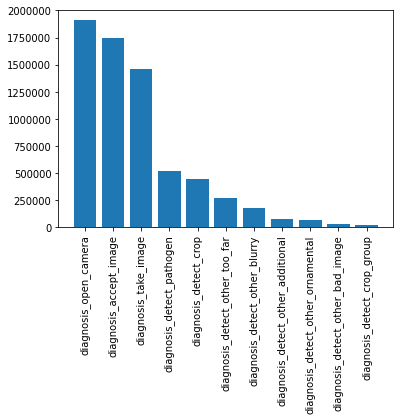

In [12]:
# bar chart of the number of events
event_name_count = pd.DataFrame(df['event_name'].value_counts())
plt.bar(event_name_count['event_name'].index, event_name_count['event_name'])
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

## Visualisation over time

In [13]:
print(df['event_timestamp'].min())
print(df['event_timestamp'].max())

2021-08-16 00:00:04.084000
2021-09-22 23:59:50.163002


<AxesSubplot:xlabel='event_timestamp'>

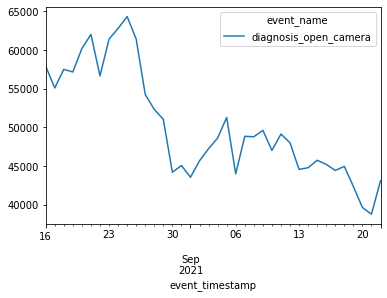

In [14]:
selected_events = ['diagnosis_open_camera']
df_daily_selected_events = df[df['event_name'].isin(selected_events)].groupby([pd.Grouper(key='event_timestamp',freq='1d'),'event_name']).size()
df_daily_selected_events.unstack().plot()

<AxesSubplot:xlabel='event_timestamp'>

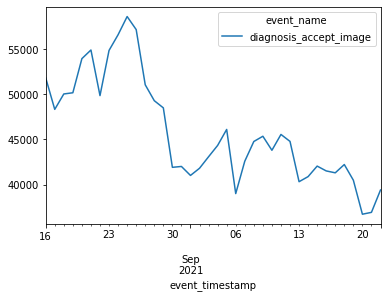

In [15]:
selected_events = ['diagnosis_accept_image']
df_daily_selected_events = df[df['event_name'].isin(selected_events)].groupby([pd.Grouper(key='event_timestamp',freq='1d'),'event_name']).size()
df_daily_selected_events.unstack().plot()


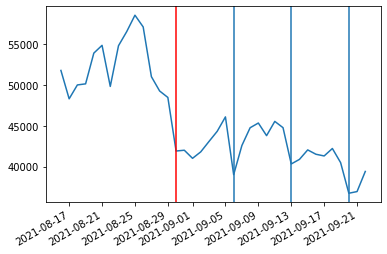

In [16]:
plt.plot(df_daily_selected_events.unstack()['diagnosis_accept_image'])
plt.gcf().autofmt_xdate()
plt.axvline(dt.datetime(2021, 8, 30),color='red')
plt.axvline(dt.datetime(2021, 9, 6))
plt.axvline(dt.datetime(2021, 9, 13))
plt.axvline(dt.datetime(2021, 9, 20))

<AxesSubplot:xlabel='event_timestamp'>

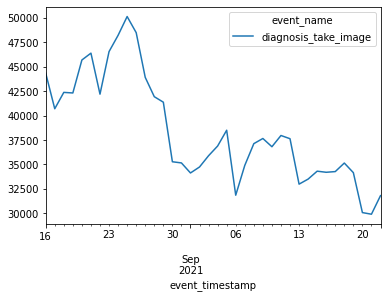

In [17]:
selected_events = ['diagnosis_take_image']
df_daily_selected_events = df[df['event_name'].isin(selected_events)].groupby([pd.Grouper(key='event_timestamp',freq='1d'),'event_name']).size()
df_daily_selected_events.unstack().plot()

<AxesSubplot:xlabel='event_timestamp'>

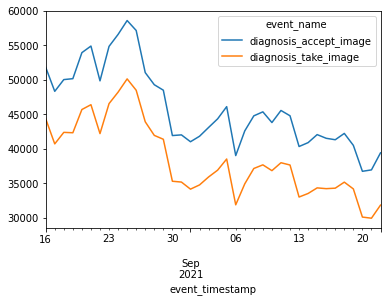

In [18]:
selected_events = ['diagnosis_take_image','diagnosis_accept_image']
df_daily_selected_events = df[df['event_name'].isin(selected_events)].groupby([pd.Grouper(key='event_timestamp',freq='1d'),'event_name']).size()
df_daily_selected_events.unstack().plot()

<AxesSubplot:xlabel='event_timestamp'>

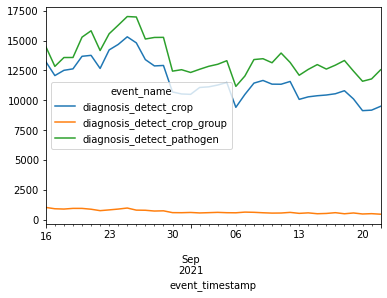

In [19]:
selected_events = ['diagnosis_detect_pathogen','diagnosis_detect_crop','diagnosis_detect_crop_group']
df_daily_selected_events = df[df['event_name'].isin(selected_events)].groupby([pd.Grouper(key='event_timestamp',freq='1d'),'event_name']).size()
df_daily_selected_events.unstack().plot()

<AxesSubplot:xlabel='event_timestamp'>

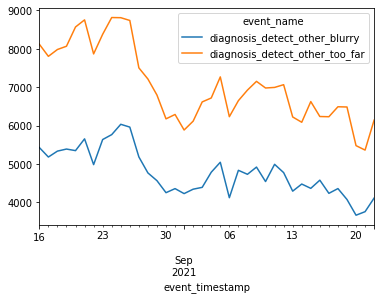

In [20]:
selected_events = ['diagnosis_detect_other_too_far','diagnosis_detect_other_blurry']
df_daily_selected_events = df[df['event_name'].isin(selected_events)].groupby([pd.Grouper(key='event_timestamp',freq='1d'),'event_name']).size()
df_daily_selected_events.unstack().plot()

<AxesSubplot:xlabel='event_timestamp'>

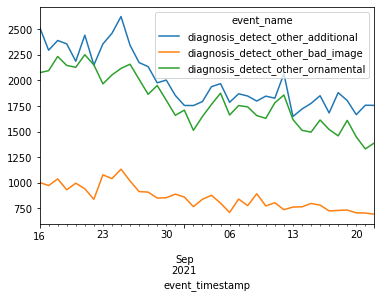

In [21]:
selected_events = ['diagnosis_detect_other_additional','diagnosis_detect_other_ornamental','diagnosis_detect_other_bad_image']
df_daily_selected_events = df[df['event_name'].isin(selected_events)].groupby([pd.Grouper(key='event_timestamp',freq='1d'),'event_name']).size()
df_daily_selected_events.unstack().plot()

## Define power cal fun

In [22]:
def power_calculation_table(conversion,proportion,average,std,alpha,power,mde,alternative):
    if (conversion == 'proportion'):
        power_calculation = {}
        for x in mde:
            power_calculation[x] = pd.DataFrame(0, alpha, power)
            for y in alpha:
                for z in power:
                    if (alternative=='smaller'):
                        effect_size = sms.proportion_effectsize(proportion-x,proportion)
                    else:
                        effect_size = sms.proportion_effectsize(proportion,proportion-x)
                    power_calculation[x].loc[y,z]= math.ceil(sms.NormalIndPower().solve_power(
                        effect_size,
                        power=z,
                        alpha=y,
                        ratio=1,
                        alternative= alternative
                        ))
        power_table = pd.concat(power_calculation)
        power_table.columns = [power_table.columns.get_level_values(0), np.repeat('Power', power_table.shape[1])]
        power_table = power_table.reset_index()
        power_table = power_table.rename(columns = {'level_0':'MDE','level_1':'Alpha'})
        power_table = power_table.set_index('MDE')
        print(power_table)
        return(power_table)
    elif(conversion == 'average'):
        power_calculation = {}
        for x in mde:
            power_calculation[x] = pd.DataFrame(0, alpha, power)
            for y in alpha:
                for z in power:
                    if (alternative=='smaller'):
                        effect_size = ((average-average*x)-average)/std
                    else:
                        effect_size = (average-(average-average*x))/std
                    power_calculation[x].loc[y,z]= math.ceil(tt_ind_solve_power(
                        effect_size,
                        power=z,
                        alpha=y,
                        ratio=1,
                        alternative= alternative
                        ))
        power_table = pd.concat(power_calculation)
        power_table.columns = [power_table.columns.get_level_values(0), np.repeat('Power', power_table.shape[1])]
        power_table = power_table.reset_index()
        power_table = power_table.rename(columns = {'level_0':'MDE','level_1':'Alpha'})
        power_table = power_table.set_index('MDE')
        print(power_table)
        return(power_table)

## Power Calculation for our AB test

### share of bad pic

In [23]:
selected_events = ['diagnosis_accept_image','diagnosis_detect_other_too_far','diagnosis_detect_other_blurry']
df_weekly_selected_events = df[df['event_name'].isin(selected_events)].groupby([pd.Grouper(key='event_timestamp',freq='1w'),'event_name']).size()
total_blurry_far = df_weekly_selected_events.unstack()
total_blurry_far['total']=total_blurry_far['diagnosis_detect_other_blurry']+total_blurry_far['diagnosis_detect_other_too_far']
total_blurry_far['conversion']=total_blurry_far['total']/total_blurry_far['diagnosis_accept_image']
total_blurry_far

event_name,diagnosis_accept_image,diagnosis_detect_other_blurry,diagnosis_detect_other_too_far,total,conversion
event_timestamp,,,,,
2021-08-22,358963,37306,57156,94462,0.263152
2021-08-29,375955,37899,56249,94148,0.250424
2021-09-05,300233,31388,45059,76447,0.254626
2021-09-12,305808,32900,47987,80887,0.264503
2021-09-19,288752,30367,44368,74735,0.258821
2021-09-26,113043,11528,16977,28505,0.252161


In [24]:
accept_image_per_day = total_blurry_far.iloc[2:5,0].mean()/21

In [25]:
p = total_blurry_far.iloc[2:5,4].mean()

In [26]:
p

0.25931628532080514

In [27]:
# use power calculation table function

# select averge or proportion for the conversion
conversion = 'proportion'
# the function use 'solve_power' if the conversion is proportion
proportion = p
# the function use 'solve_power' if the conversion is average
average = 0
std = 1
alpha = [0.01/4,0.05/4,0.10/4]
power = [0.8,0.9]
mde = [0.01,0.05,0.10]
# select smaller, larger or two-sided
alternative = 'smaller'

power_table = power_calculation_table(conversion,proportion,average,std,alpha,power,mde,alternative)

       Alpha    0.8    0.9
              Power  Power
MDE                       
0.01  0.0025  50488  63397
0.01  0.0125  36048  47070
0.01  0.0250  29767  39850
0.05  0.0025   1906   2394
0.05  0.0125   1361   1777
0.05  0.0250   1124   1505
0.10  0.0025    435    547
0.10  0.0125    311    406
0.10  0.0250    257    344


In [28]:
2*power_table.max().max()/accept_image_per_day

8.927228979216423

### share good pic

In [29]:
selected_events = ['diagnosis_accept_image','diagnosis_detect_pathogen','diagnosis_detect_crop','diagnosis_detect_crop_group']
df_weekly_selected_events = df[df['event_name'].isin(selected_events)].groupby([pd.Grouper(key='event_timestamp',freq='1w'),'event_name']).size()
total_good_pic = df_weekly_selected_events.unstack()
total_good_pic['total']=total_good_pic['diagnosis_detect_pathogen']+total_good_pic['diagnosis_detect_crop']+total_good_pic['diagnosis_detect_crop_group']
total_good_pic['conversion']=total_good_pic['total']/total_good_pic['diagnosis_accept_image']
total_good_pic

event_name,diagnosis_accept_image,diagnosis_detect_crop,diagnosis_detect_crop_group,diagnosis_detect_pathogen,total,conversion
event_timestamp,,,,,,
2021-08-22,358963,90576,6299,99801,196676,0.547900
2021-08-29,375955,98246,5684,111550,215480,0.573154
2021-09-05,300233,76696,4073,89123,169892,0.565867
2021-09-12,305808,77277,4071,90376,171724,0.561542
2021-09-19,288752,72649,3707,89023,165379,0.572737
2021-09-26,113043,27800,1415,35940,65155,0.576374


In [30]:
accept_image_per_day = total_good_pic.iloc[2:5,0].mean()/21

In [31]:
p = total_good_pic.iloc[2:5,5].mean()

In [32]:
p

0.5667154058372621

In [33]:
# use power calculation table function

# select averge or proportion for the conversion
conversion = 'proportion'
# the function use 'solve_power' if the conversion is proportion
proportion = p
# the function use 'solve_power' if the conversion is average
average = 0
std = 1
alpha = [0.01/4,0.05/4,0.10/4]
power = [0.8,0.9]
mde = [0.01,0.05,0.10]
# select smaller, larger or two-sided
alternative = 'larger'

power_table = power_calculation_table(conversion,proportion,average,std,alpha,power,mde,alternative)

       Alpha    0.8    0.9
              Power  Power
MDE                       
0.01  0.0025  65547  82307
0.01  0.0125  46800  61109
0.01  0.0250  38646  51735
0.05  0.0025   2642   3318
0.05  0.0125   1887   2463
0.05  0.0250   1558   2086
0.10  0.0025    663    833
0.10  0.0125    474    618
0.10  0.0250    391    524


In [34]:
2*power_table.max().max()/accept_image_per_day

11.590034790169348

### take image per day

In [35]:
selected_events = ['diagnosis_take_image']
df_daily_take_image = df[df['event_name'].isin(selected_events)].groupby([pd.Grouper(key='event_timestamp',freq='1d'),'event_name']).size()
daily_take_image = df_daily_take_image.unstack()

In [36]:
m = daily_take_image.iloc[:,0].mean()
m

38408.44736842105

In [37]:
d = daily_take_image.iloc[:,0].std()
d

5437.220656744402

In [38]:
# use power calculation table function

# select averge or proportion for the conversion
conversion = 'average'
# the function use 'solve_power' if the conversion is proportion
proportion = 0
# the function use 'solve_power' if the conversion is average
average = m
std = d
alpha = [0.01/4,0.05/4,0.10/4]
power = [0.8,0.9]
mde = [0.01,0.05,0.10]
# select smaller, larger or two-sided
alternative = 'two-sided'

power_table = power_calculation_table(conversion,proportion,average,std,alpha,power,mde,alternative)

       Alpha   0.8   0.9
             Power Power
MDE                     
0.01  0.0025  5990  7430
0.01  0.0125  4471  5727
0.01  0.0250  3811  4976
0.05  0.0025   242   300
0.05  0.0125   181   231
0.05  0.0250   154   201
0.10  0.0025    63    77
0.10  0.0125    47    59
0.10  0.0250    40    52


In [39]:
2*power_table.max().max()

14860.0

### open camera per day

In [40]:
selected_events = ['diagnosis_open_camera']
df_daily_open_camera = df[df['event_name'].isin(selected_events)].groupby([pd.Grouper(key='event_timestamp',freq='1d'),'event_name']).size()
daily_open_camera = df_daily_open_camera.unstack()

In [41]:
m = daily_open_camera.iloc[:,0].mean()
m

50234.5

In [42]:
d = daily_open_camera.iloc[:,0].std()
d

6995.956062592855

In [43]:
# use power calculation table function

# select averge or proportion for the conversion
conversion = 'average'
# the function use 'solve_power' if the conversion is proportion
proportion = 0
# the function use 'solve_power' if the conversion is average
average = m
std = d
alpha = [0.01/4,0.05/4,0.10/4]
power = [0.8,0.9]
mde = [0.01,0.05,0.10]
# select smaller, larger or two-sided
alternative = 'two-sided'

power_table = power_calculation_table(conversion,proportion,average,std,alpha,power,mde,alternative)

       Alpha   0.8   0.9
             Power Power
MDE                     
0.01  0.0025  5797  7191
0.01  0.0125  4328  5542
0.01  0.0250  3689  4816
0.05  0.0025   235   290
0.05  0.0125   175   224
0.05  0.0250   149   194
0.10  0.0025    61    75
0.10  0.0125    45    57
0.10  0.0250    39    50


In [44]:
2*power_table.max().max()

14382.0

## Power Calculation for 2 AB test

### Preparation

In [45]:
user_id = pd.DataFrame(df['user_pseudo_id'].unique())
print(len(user_id))

449951


In [46]:
returning_user_id = pd.DataFrame(df[df['event_timestamp']<'2021-08-30 00:00:00.000000']['user_pseudo_id'].unique())
print(len(returning_user_id))

233529


In [47]:
new_user_id = user_id[-user_id[0].isin(returning_user_id[0])]
print(len(new_user_id))

216422


### new user

#### Preparation

In [48]:
df_sep = df[(df['event_timestamp']>='2021-08-30 00:00:00.000000')&(df['event_timestamp']<'2021-09-20 00:00:00.000000')]

In [49]:
new_user_events = df_sep[df_sep['user_pseudo_id'].isin(new_user_id[0])]['event_name'].value_counts()
new_user_events

diagnosis_open_camera                684556
diagnosis_accept_image               603258
diagnosis_take_image                 504901
diagnosis_detect_pathogen            165502
diagnosis_detect_crop                145516
diagnosis_detect_other_too_far       101133
diagnosis_detect_other_blurry         66025
diagnosis_detect_other_additional     28904
diagnosis_detect_other_ornamental     28746
diagnosis_detect_other_bad_image      11760
diagnosis_detect_crop_group            8543
Name: event_name, dtype: int64

In [50]:
print(df_sep[df_sep['user_pseudo_id'].isin(new_user_id[0])]['event_timestamp'].max())
print(df_sep[df_sep['user_pseudo_id'].isin(new_user_id[0])]['event_timestamp'].min())
print(df_sep[df_sep['user_pseudo_id'].isin(new_user_id[0])]['event_timestamp'].max()-df_sep[df_sep['user_pseudo_id'].isin(new_user_id[0])]['event_timestamp'].min())

2021-09-19 23:59:56.119003
2021-08-30 00:00:32.724000
20 days 23:59:23.395003


In [51]:
accept_image_per_day_new_user =new_user_events['diagnosis_accept_image']/21
accept_image_per_day_new_user

28726.571428571428

#### bed events

In [52]:
# use power calculation table function

# select averge or proportion for the conversion
conversion = 'proportion'
# the function use 'solve_power' if the conversion is proportion
proportion = (new_user_events['diagnosis_detect_other_too_far']+new_user_events['diagnosis_detect_other_blurry'])/new_user_events['diagnosis_accept_image']
# the function use 'solve_power' if the conversion is average
average = 0
std = 1
alpha = [0.01,0.05,0.10]
power = [0.8,0.9]
mde = [0.01,0.05,0.10]
# select smaller, larger or two-sided
alternative = 'smaller'

power_table = power_calculation_table(conversion,proportion,average,std,alpha,power,mde,alternative)

     Alpha    0.8    0.9
            Power  Power
MDE                     
0.01  0.01  39752  51559
0.01  0.05  24489  33921
0.01  0.10  17856  26021
0.05  0.01   1511   1960
0.05  0.05    931   1289
0.05  0.10    679    989
0.10  0.01    349    452
0.10  0.05    215    298
0.10  0.10    157    229


In [53]:
power_table

,Alpha,0.8,0.9
,,Power,Power
MDE,,,
0.01,0.01,39752,51559
0.01,0.05,24489,33921
0.01,0.10,17856,26021
0.05,0.01,1511,1960
0.05,0.05,931,1289
0.05,0.10,679,989
0.10,0.01,349,452
0.10,0.05,215,298


In [54]:
proportion

0.27709205679825216

In [55]:
2*power_table.max().max()/accept_image_per_day_new_user

3.589638264225257

#### good events

In [56]:
# use power calculation table function

# select averge or proportion for the conversion
conversion = 'proportion'
# the function use 'solve_power' if the conversion is proportion
proportion = (new_user_events['diagnosis_detect_crop']+new_user_events['diagnosis_detect_crop_group']+new_user_events['diagnosis_detect_pathogen'])/new_user_events['diagnosis_accept_image']
# the function use 'solve_power' if the conversion is average
average = 0
std = 1
alpha = [0.01,0.05,0.10]
power = [0.8,0.9]
mde = [0.01,0.05,0.10]
# select smaller, larger or two-sided
alternative = 'larger'

power_table = power_calculation_table(conversion,proportion,average,std,alpha,power,mde,alternative)

     Alpha    0.8    0.9
            Power  Power
MDE                     
0.01  0.01  50056  64924
0.01  0.05  30837  42714
0.01  0.10  22484  32767
0.05  0.01   2006   2601
0.05  0.05   1236   1712
0.05  0.10    901   1313
0.10  0.01    500    648
0.10  0.05    308    427
0.10  0.10    225    327


In [57]:
power_table

,Alpha,0.8,0.9
,,Power,Power
MDE,,,
0.01,0.01,50056,64924
0.01,0.05,30837,42714
0.01,0.10,22484,32767
0.05,0.01,2006,2601
0.05,0.05,1236,1712
0.05,0.10,901,1313
0.10,0.01,500,648
0.10,0.05,308,427


In [58]:
proportion

0.5297252585129414

In [59]:
2*power_table.max().max()/accept_image_per_day_new_user

4.520135663348021

### returning user

#### Preparation

In [60]:
df_sep = df[(df['event_timestamp']>='2021-08-30 00:00:00.000000')&(df['event_timestamp']<'2021-09-20 00:00:00.000000')]

In [61]:
returning_user_events = df_sep[df_sep['user_pseudo_id'].isin(returning_user_id[0])]['event_name'].value_counts()
returning_user_events

diagnosis_accept_image               291535
diagnosis_open_camera                288788
diagnosis_take_image                 238284
diagnosis_detect_pathogen            103020
diagnosis_detect_crop                 81106
diagnosis_detect_other_too_far        36281
diagnosis_detect_other_blurry         28630
diagnosis_detect_other_additional      9555
diagnosis_detect_other_ornamental      6131
diagnosis_detect_other_bad_image       4942
diagnosis_detect_crop_group            3308
Name: event_name, dtype: int64

In [62]:
print(df_sep[df_sep['user_pseudo_id'].isin(returning_user_id[0])]['event_timestamp'].max())
print(df_sep[df_sep['user_pseudo_id'].isin(returning_user_id[0])]['event_timestamp'].min())
print(df_sep[df_sep['user_pseudo_id'].isin(returning_user_id[0])]['event_timestamp'].max()-df_sep[df_sep['user_pseudo_id'].isin(returning_user_id[0])]['event_timestamp'].min())

2021-09-19 23:58:01.021004
2021-08-30 00:00:03.920000
20 days 23:57:57.101004


In [63]:
accept_image_per_day_returning_user = returning_user_events['diagnosis_accept_image']/24
accept_image_per_day_returning_user

12147.291666666666

#### bed events

In [64]:
# use power calculation table function

# select averge or proportion for the conversion
conversion = 'proportion'
# the function use 'solve_power' if the conversion is proportion
proportion = (returning_user_events['diagnosis_detect_other_too_far']+returning_user_events['diagnosis_detect_other_blurry'])/returning_user_events['diagnosis_accept_image']
# the function use 'solve_power' if the conversion is average
average = 0
std = 1
alpha = [0.01,0.05,0.10]
power = [0.8,0.9]
mde = [0.01,0.05,0.10]
# select smaller, larger or two-sided
alternative = 'smaller'

power_table = power_calculation_table(conversion,proportion,average,std,alpha,power,mde,alternative)

     Alpha    0.8    0.9
            Power  Power
MDE                     
0.01  0.01  34175  44326
0.01  0.05  21053  29162
0.01  0.10  15351  22371
0.05  0.01   1269   1646
0.05  0.05    782   1083
0.05  0.10    570    831
0.10  0.01    282    365
0.10  0.05    174    240
0.10  0.10    127    185


In [65]:
power_table

,Alpha,0.8,0.9
,,Power,Power
MDE,,,
0.01,0.01,34175,44326
0.01,0.05,21053,29162
0.01,0.10,15351,22371
0.05,0.01,1269,1646
0.05,0.05,782,1083
0.05,0.10,570,831
0.10,0.01,282,365
0.10,0.05,174,240


In [66]:
proportion

0.2226525117052841

In [67]:
2*power_table.max().max()/accept_image_per_day_returning_user

7.298087708165401

#### good events

In [68]:
# use power calculation table function

# select averge or proportion for the conversion
conversion = 'proportion'
# the function use 'solve_power' if the conversion is proportion
proportion = (returning_user_events['diagnosis_detect_crop']+returning_user_events['diagnosis_detect_crop_group']+returning_user_events['diagnosis_detect_pathogen'])/returning_user_events['diagnosis_accept_image']
# the function use 'solve_power' if the conversion is average
average = 0
std = 1
alpha = [0.01,0.05,0.10]
power = [0.8,0.9]
mde = [0.01,0.05,0.10]
# select smaller, larger or two-sided
alternative = 'larger'

power_table = power_calculation_table(conversion,proportion,average,std,alpha,power,mde,alternative)

     Alpha    0.8    0.9
            Power  Power
MDE                     
0.01  0.01  46360  60130
0.01  0.05  28560  39560
0.01  0.10  20824  30347
0.05  0.01   1894   2457
0.05  0.05   1167   1616
0.05  0.10    851   1240
0.10  0.01    483    626
0.10  0.05    298    412
0.10  0.10    217    316


In [69]:
power_table

,Alpha,0.8,0.9
,,Power,Power
MDE,,,
0.01,0.01,46360,60130
0.01,0.05,28560,39560
0.01,0.10,20824,30347
0.05,0.01,1894,2457
0.05,0.05,1167,1616
0.05,0.10,851,1240
0.10,0.01,483,626
0.10,0.05,298,412


In [70]:
proportion

0.6429210900920987

In [71]:
2*power_table.max().max()/accept_image_per_day_returning_user

9.900149210214897

# After runing 1 / 2 AB test

## Load Data

In [72]:
# load data
db = pd.DataFrame(pd.read_csv
(r"C:\00 HDD 00\HTW Berlin\2021 Winter\3.1 Project Management and Data Analytics Lab\Data\camera_ml_v4_camera_ml_v4_events_after.csv",
dtype={'event_timestamp':str,'user_first_touch_timestamp':str}))
assignment = pd.DataFrame(pd.read_csv
(r"C:\00 HDD 00\HTW Berlin\2021 Winter\3.1 Project Management and Data Analytics Lab\Data\camera_ml_v4_camera_ml_v4_test_assignment.csv",
dtype={'event_timestamp':str}))

In [73]:
db.head()

,user_pseudo_id,event_name,event_timestamp,user_first_touch_timestamp,operating_system_version,mobile_brand_name,mobile_model_name,LANGUAGE,country,region
0,c9b35468ce1e104f28d2cf93bedfcd92,diagnosis_open_camera,1636122548631001,1634258032407000,Android 5.1.1,OPPO,A37f,en-us,India,Haryana
1,9483fd2102dd908aa0b11542bd4f2e37,diagnosis_open_camera,1636154364069001,1631953891779000,Android 10,Vivo,V2029,en-us,India,Andhra Pradesh
2,19040679d034684fa53e2df46d569980,diagnosis_open_camera,1636116454580000,1631152442558000,Android 8.1.0,Samsung,SM-A260G,en-au,India,Telangana
3,8ddf80262676e60b3154741f49cf5379,diagnosis_detect_other_blurry,1636127887438000,1633963271595000,Android 8.1.0,LG,LM-Q710.FGN,en-gb,India,Andhra Pradesh
4,7a69a8c7b15dcbfee177d305b6637e83,diagnosis_open_camera,1636123580950001,1622559101506000,Android 7.1.1,OPPO,CPH1801,en-au,India,Rajasthan


In [74]:
assignment.head()

,user_pseudo_id,event_timestamp,app_version,key,string_value
0,0003aafc786ac5b113fedf743092af14,1632807119580003,3.6.2,camera_quality_analysis_v4,variant_a
1,0011803f34e3e2e2fc2edf60851417df,1633830483978002,3.6.2,camera_quality_analysis_new_user_v4,control_group
2,002bc7c683f91231b6d19d514336efc9,1632584747791002,3.6.2,camera_quality_analysis_new_user_v4,control_group
3,004dbccabe782edbe7c2dd4f9d971a3b,1633933712724002,3.6.2,camera_quality_analysis_new_user_v4,variant_a
4,004fd885ba9bd30016d8e77bbbef4f1c,1634471639000006,3.6.2,camera_quality_analysis_v4,variant_a


In [75]:
# change variable type to datetime
db['user_first_touch_timestamp']= pd.to_datetime(db['user_first_touch_timestamp'],unit='us')

In [76]:
# change variable type to datetime
db['event_timestamp']= pd.to_datetime(db['event_timestamp'],unit='us')

In [77]:
db.head()

,user_pseudo_id,event_name,event_timestamp,user_first_touch_timestamp,operating_system_version,mobile_brand_name,mobile_model_name,LANGUAGE,country,region
0,c9b35468ce1e104f28d2cf93bedfcd92,diagnosis_open_camera,2021-11-05 14:29:08.631001,2021-10-15 00:33:52.407,Android 5.1.1,OPPO,A37f,en-us,India,Haryana
1,9483fd2102dd908aa0b11542bd4f2e37,diagnosis_open_camera,2021-11-05 23:19:24.069001,2021-09-18 08:31:31.779,Android 10,Vivo,V2029,en-us,India,Andhra Pradesh
2,19040679d034684fa53e2df46d569980,diagnosis_open_camera,2021-11-05 12:47:34.580000,2021-09-09 01:54:02.558,Android 8.1.0,Samsung,SM-A260G,en-au,India,Telangana
3,8ddf80262676e60b3154741f49cf5379,diagnosis_detect_other_blurry,2021-11-05 15:58:07.438000,2021-10-11 14:41:11.595,Android 8.1.0,LG,LM-Q710.FGN,en-gb,India,Andhra Pradesh
4,7a69a8c7b15dcbfee177d305b6637e83,diagnosis_open_camera,2021-11-05 14:46:20.950001,2021-06-01 14:51:41.506,Android 7.1.1,OPPO,CPH1801,en-au,India,Rajasthan


In [78]:
# change variable type to datetime
assignment['event_timestamp']= pd.to_datetime(assignment['event_timestamp'],unit='us')

In [79]:
assignment.head()

,user_pseudo_id,event_timestamp,app_version,key,string_value
0,0003aafc786ac5b113fedf743092af14,2021-09-28 05:31:59.580003,3.6.2,camera_quality_analysis_v4,variant_a
1,0011803f34e3e2e2fc2edf60851417df,2021-10-10 01:48:03.978002,3.6.2,camera_quality_analysis_new_user_v4,control_group
2,002bc7c683f91231b6d19d514336efc9,2021-09-25 15:45:47.791002,3.6.2,camera_quality_analysis_new_user_v4,control_group
3,004dbccabe782edbe7c2dd4f9d971a3b,2021-10-11 06:28:32.724002,3.6.2,camera_quality_analysis_new_user_v4,variant_a
4,004fd885ba9bd30016d8e77bbbef4f1c,2021-10-17 11:53:59.000006,3.6.2,camera_quality_analysis_v4,variant_a


## Data understaning

In [80]:
# no. of rows and cols
print(db.shape)
print(assignment.shape)

(3913752, 10)
(322406, 5)


In [81]:
assignment.duplicated(subset=['user_pseudo_id']).sum()

0

In [82]:
# getting data type
db.dtypes

user_pseudo_id                        object
event_name                            object
event_timestamp               datetime64[ns]
user_first_touch_timestamp    datetime64[ns]
operating_system_version              object
mobile_brand_name                     object
mobile_model_name                     object
LANGUAGE                              object
country                               object
region                                object
dtype: object

In [83]:
# getting data type
assignment.dtypes

user_pseudo_id             object
event_timestamp    datetime64[ns]
app_version                object
key                        object
string_value               object
dtype: object

In [84]:
# number of missing values
db.isnull().sum()

user_pseudo_id                    0
event_name                        0
event_timestamp                   0
user_first_touch_timestamp        2
operating_system_version          0
mobile_brand_name             41930
mobile_model_name             41930
LANGUAGE                          0
country                          13
region                        81990
dtype: int64

In [85]:
# number of missing values
assignment.isnull().sum()

user_pseudo_id     0
event_timestamp    0
app_version        0
key                0
string_value       0
dtype: int64

In [86]:
# Check the number of values
db[['event_name']].value_counts()

event_name                       
diagnosis_open_camera                1099021
diagnosis_accept_image                983219
diagnosis_take_image                  902860
diagnosis_detect_pathogen             316225
diagnosis_detect_crop                 252406
diagnosis_detect_other_too_far        120960
diagnosis_detect_other_blurry          91288
diagnosis_detect_other_additional      59748
diagnosis_detect_other_ornamental      48768
diagnosis_detect_other_bad_image       24741
diagnosis_detect_crop_group            14516
dtype: int64

In [87]:
# Check the number of values
assignment[['key','string_value']].value_counts()

key                                  string_value 
camera_quality_analysis_new_user_v4  variant_a        124550
                                     control_group    124440
camera_quality_analysis_v4           variant_a         36750
                                     control_group     36666
dtype: int64

## Data preparation

In [88]:
joined_db = db.join(assignment.set_index(['user_pseudo_id']),on=['user_pseudo_id'], lsuffix='_db', rsuffix='_assignment')

In [89]:
joined_db

,user_pseudo_id,event_name,event_timestamp_db,user_first_touch_timestamp,operating_system_version,mobile_brand_name,mobile_model_name,LANGUAGE,country,region,event_timestamp_assignment,app_version,key,string_value
0,c9b35468ce1e104f28d2cf93bedfcd92,diagnosis_open_camera,2021-11-05 14:29:08.631001,2021-10-15 00:33:52.407,Android 5.1.1,OPPO,A37f,en-us,India,Haryana,2021-10-15 00:34:06.472002,3.6.2,camera_quality_analysis_new_user_v4,control_group
1,9483fd2102dd908aa0b11542bd4f2e37,diagnosis_open_camera,2021-11-05 23:19:24.069001,2021-09-18 08:31:31.779,Android 10,Vivo,V2029,en-us,India,Andhra Pradesh,2021-10-08 06:15:33.257004,3.6.2,camera_quality_analysis_v4,control_group
2,19040679d034684fa53e2df46d569980,diagnosis_open_camera,2021-11-05 12:47:34.580000,2021-09-09 01:54:02.558,Android 8.1.0,Samsung,SM-A260G,en-au,India,Telangana,NaT,NaN,NaN,NaN
3,8ddf80262676e60b3154741f49cf5379,diagnosis_detect_other_blurry,2021-11-05 15:58:07.438000,2021-10-11 14:41:11.595,Android 8.1.0,LG,LM-Q710.FGN,en-gb,India,Andhra Pradesh,2021-10-11 14:41:26.696002,3.6.2,camera_quality_analysis_new_user_v4,control_group
4,7a69a8c7b15dcbfee177d305b6637e83,diagnosis_open_camera,2021-11-05 14:46:20.950001,2021-06-01 14:51:41.506,Android 7.1.1,OPPO,CPH1801,en-au,India,Rajasthan,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3913747,2fe8c13f64cdcb9ae6b7de700e17dd36,diagnosis_take_image,2021-10-07 08:23:34.964006,2021-02-03 03:53:03.473,Android 11,OnePlus,HD1901,en-in,India,Maharashtra,2021-10-07 08:22:40.420002,3.6.2,camera_quality_analysis_v4,variant_a
3913748,2fe8c13f64cdcb9ae6b7de700e17dd36,diagnosis_take_image,2021-10-07 08:24:18.849006,2021-02-03 03:53:03.473,Android 11,OnePlus,HD1901,en-in,India,Maharashtra,2021-10-07 08:22:40.420002,3.6.2,camera_quality_analysis_v4,variant_a
3913749,2fe8c13f64cdcb9ae6b7de700e17dd36,diagnosis_detect_other_additional,2021-10-07 08:24:25.709001,2021-02-03 03:53:03.473,Android 11,OnePlus,HD1901,en-in,India,Maharashtra,2021-10-07 08:22:40.420002,3.6.2,camera_quality_analysis_v4,variant_a
3913750,4ff4c1bdf31e00e31265f5f99db52545,diagnosis_take_image,2021-10-07 03:58:31.961005,2021-02-20 10:40:24.390,Android 10,Xiaomi,M2006C3LI,en-in,India,Maharashtra,2021-10-06 02:39:35.512002,3.6.2,camera_quality_analysis_v4,control_group


In [90]:
joined_db.shape

(3913752, 14)

In [91]:
joined_db.isnull().sum()

user_pseudo_id                    0
event_name                        0
event_timestamp_db                0
user_first_touch_timestamp        2
operating_system_version          0
mobile_brand_name             41930
mobile_model_name             41930
LANGUAGE                          0
country                          13
region                        81990
event_timestamp_assignment    33161
app_version                   33161
key                           33161
string_value                  33161
dtype: int64

In [92]:
joined_db[['key','string_value']].value_counts().sum() + 33161

3913752

In [93]:
joined_db[['key','string_value']].value_counts()

key                                  string_value 
camera_quality_analysis_new_user_v4  control_group    1448682
                                     variant_a        1341639
camera_quality_analysis_v4           control_group     552606
                                     variant_a         537664
dtype: int64

## Calculation

### New Users

In [94]:
new_user_control = joined_db[(joined_db['key']=='camera_quality_analysis_new_user_v4')&(joined_db['string_value']=='control_group')]['event_name'].value_counts()

In [154]:
col_test = ['event_name','event_timestamp_db']

In [197]:
test = joined_db[(joined_db['key']=='camera_quality_analysis_v4')&(joined_db['string_value']=='control_group')][col_test]

In [198]:
test

,event_name,event_timestamp_db
1,diagnosis_open_camera,2021-11-05 23:19:24.069001
53,diagnosis_open_camera,2021-10-09 23:35:03.051000
54,diagnosis_accept_image,2021-10-09 23:35:04.882001
113,diagnosis_open_camera,2021-10-09 11:54:11.263000
124,diagnosis_open_camera,2021-10-09 11:59:57.255003
...,...,...
3913698,diagnosis_detect_other_blurry,2021-10-07 02:27:49.292000
3913699,diagnosis_take_image,2021-10-07 02:28:12.403002
3913745,diagnosis_take_image,2021-10-07 06:15:04.425000
3913750,diagnosis_take_image,2021-10-07 03:58:31.961005


In [199]:
selected_events=['diagnosis_accept_image']

In [200]:
test_daily = test[test['event_name'].isin(selected_events)].groupby([pd.Grouper(key='event_timestamp_db',freq='1d'),'event_name']).size()

In [201]:
df = test_daily.unstack()

In [202]:
df.head()

event_name,diagnosis_accept_image
event_timestamp_db,
2021-09-22,213
2021-09-23,436
2021-09-24,491
2021-09-25,1483
2021-09-26,2389


In [203]:
df

event_name,diagnosis_accept_image
event_timestamp_db,
2021-09-22,213
2021-09-23,436
2021-09-24,491
2021-09-25,1483
2021-09-26,2389
2021-09-27,2541
2021-09-28,3015
2021-09-29,3480
2021-09-30,3365


In [204]:
df.to_excel(r'file_Name2.xlsx', index = False, header=True)

<AxesSubplot:xlabel='event_timestamp_db'>

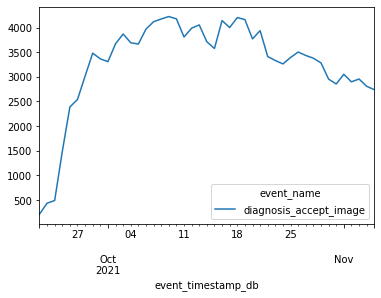

In [205]:
test_daily.unstack().plot()

In [95]:
new_user_variant = joined_db[(joined_db['key']=='camera_quality_analysis_new_user_v4')&(joined_db['string_value']=='variant_a')]['event_name'].value_counts()

In [96]:
new_user_control

diagnosis_open_camera                402595
diagnosis_accept_image               374825
diagnosis_take_image                 320029
diagnosis_detect_pathogen            106500
diagnosis_detect_crop                 88092
diagnosis_detect_other_too_far        57343
diagnosis_detect_other_blurry         42749
diagnosis_detect_other_additional     22615
diagnosis_detect_other_ornamental     19492
diagnosis_detect_other_bad_image       9160
diagnosis_detect_crop_group            5282
Name: event_name, dtype: int64

In [97]:
new_user_variant

diagnosis_open_camera                393623
diagnosis_take_image                 328793
diagnosis_accept_image               319467
diagnosis_detect_pathogen            101769
diagnosis_detect_crop                 84766
diagnosis_detect_other_too_far        34400
diagnosis_detect_other_blurry         25382
diagnosis_detect_other_additional     21623
diagnosis_detect_other_ornamental     18349
diagnosis_detect_other_bad_image       8337
diagnosis_detect_crop_group            5130
Name: event_name, dtype: int64

In [98]:
share_bad_images_uploaded_new_user_control = (
    (new_user_control['diagnosis_detect_other_too_far']+ new_user_control['diagnosis_detect_other_blurry'])/new_user_control['diagnosis_accept_image']
)

share_bad_images_uploaded_new_user_variant = (
    (new_user_variant['diagnosis_detect_other_too_far']+ new_user_variant['diagnosis_detect_other_blurry'])/new_user_variant['diagnosis_accept_image']
)

share_good_images_uploaded_new_user_control = (
    (new_user_control['diagnosis_detect_pathogen']+new_user_control['diagnosis_detect_crop']+new_user_control['diagnosis_detect_crop_group'])/new_user_control['diagnosis_accept_image']
)

share_good_images_uploaded_new_user_variant = (
    (new_user_variant['diagnosis_detect_pathogen']+new_user_variant['diagnosis_detect_crop']+new_user_variant['diagnosis_detect_crop_group'])/new_user_variant['diagnosis_accept_image']
)

In [99]:
print(share_bad_images_uploaded_new_user_control)
print(share_bad_images_uploaded_new_user_variant)
print(share_good_images_uploaded_new_user_control)
print(share_good_images_uploaded_new_user_variant)

0.2670366170879744
0.1871304391376887
0.5332461815513907
0.5999524207508131


#### Bad events (new users)

In [100]:
n_con = new_user_control['diagnosis_accept_image']
n_var = new_user_variant['diagnosis_accept_image']
successes = [
    (new_user_control['diagnosis_detect_other_too_far']+ new_user_control['diagnosis_detect_other_blurry']),
    (new_user_variant['diagnosis_detect_other_too_far']+ new_user_variant['diagnosis_detect_other_blurry'])
    ]
nobs = [n_con, n_var]
z_stat, pval = proportions_ztest(successes,nobs=nobs,alternative='larger')
(lower_con, lower_var), (upper_con, upper_var) = proportion_confint(successes, nobs=nobs, alpha=0.05)

print(f'No. of images uploaded by control group: {n_con}')
print(f'No. of images with quality issues (control): {successes[0]}')
print(f'share of images with quality issues uploaded by new users (control): {share_bad_images_uploaded_new_user_control*100:.2f}%')
print(f'No. of images uploaded by variant group: {n_var}')
print(f'No. of images with quality issues (variant): {successes[1]}')
print(f'share of images with quality issues uploaded by new users (variant): {share_bad_images_uploaded_new_user_variant*100:.2f}%')
print(f'Relative Change: {(share_bad_images_uploaded_new_user_variant-share_bad_images_uploaded_new_user_control)/share_bad_images_uploaded_new_user_control*100:.0f}%')

print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print(f'ci 95% for control group: [{lower_con:.3f},{upper_con:.3f}]')
print(f'ci 95% for variant group: [{lower_var:.3f},{upper_var:.3f}]')

No. of images uploaded by control group: 374825
No. of images with quality issues (control): 100092
share of images with quality issues uploaded by new users (control): 26.70%
No. of images uploaded by variant group: 319467
No. of images with quality issues (variant): 59782
share of images with quality issues uploaded by new users (variant): 18.71%
Relative Change: -30%
z statistic: 78.82
p-value: 0.000
ci 95% for control group: [0.266,0.268]
ci 95% for variant group: [0.186,0.188]


C:\Users\Behzad\AppData\Local\Temp/ipykernel_4200/3452898183.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot((lower,upper),(y,y),'ro-',color='orange')


Text(0.5, 1.0, '95% ci of (bad_events / accept_images) for new users')

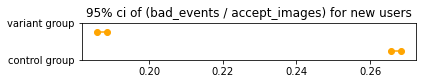

In [101]:
for lower,upper,y in zip([lower_con,lower_var],[upper_con,upper_var],[0,1]):
    plt.plot((lower,upper),(y,y),'ro-',color='orange')
plt.gca().set_aspect(0.005, adjustable='box')
plt.yticks([-0.5,1.5],['control group','variant group'])
plt.title('95% ci of (bad_events / accept_images) for new users')

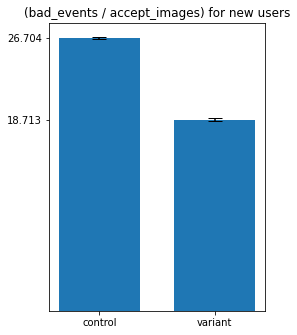

In [102]:
fig = plt.figure()
ax = fig.add_axes([0,0,0.5,1])
langs = ['control', 'variant']
shares = [share_bad_images_uploaded_new_user_control*100,share_bad_images_uploaded_new_user_variant*100]
ax.bar(langs,shares,width=0.7,yerr=(upper_con-lower_con)/2*100,capsize=7)
ax.set_ylim(ymin=0)
plt.yticks([share_bad_images_uploaded_new_user_control*100,share_bad_images_uploaded_new_user_variant*100])
plt.title('(bad_events / accept_images) for new users')
plt.show()

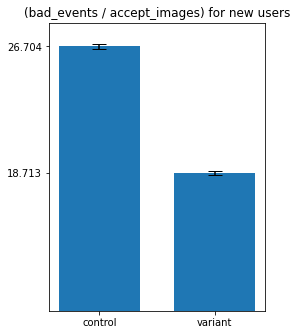

In [103]:
fig = plt.figure()
ax = fig.add_axes([0,0,0.5,1])
langs = ['control', 'variant']
shares = [share_bad_images_uploaded_new_user_control*100,share_bad_images_uploaded_new_user_variant*100]
ax.bar(langs,shares,width=0.7,yerr=(upper_con-lower_con)/2*100,capsize=7)
ax.set_ylim(ymin=10)
plt.yticks([share_bad_images_uploaded_new_user_control*100,share_bad_images_uploaded_new_user_variant*100])
plt.title('(bad_events / accept_images) for new users')
plt.show()

#### Good events (new users)

In [104]:
n_con = new_user_control['diagnosis_accept_image']
n_var = new_user_variant['diagnosis_accept_image']
successes = [
    (new_user_control['diagnosis_detect_pathogen']+ new_user_control['diagnosis_detect_crop']+new_user_control['diagnosis_detect_crop_group']),
    (new_user_variant['diagnosis_detect_pathogen']+ new_user_variant['diagnosis_detect_crop']+new_user_variant['diagnosis_detect_crop_group'])
    ]
nobs = [n_con, n_var]
z_stat, pval = proportions_ztest(successes,nobs=nobs,alternative='smaller')
(lower_con, lower_var), (upper_con, upper_var) = proportion_confint(successes, nobs=nobs, alpha=0.05)

print(f'No. of images uploaded by control group: {n_con}')
print(f'No. of detect crop images (control): {successes[0]}')
print(f'share of good images uploaded by new users (control): {share_good_images_uploaded_new_user_control*100:.2f}%')
print(f'No. of images uploaded by variant group: {n_var}')
print(f'No. of detect crop images (variant): {successes[1]}')
print(f'share of good images uploaded by new users (variant): {share_good_images_uploaded_new_user_variant*100:.2f}%')
print(f'Relative Change: {(share_good_images_uploaded_new_user_variant-share_good_images_uploaded_new_user_control)/share_good_images_uploaded_new_user_control*100:.0f}%')

print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print(f'ci 95% for control group: [{lower_con:.3f},{upper_con:.3f}]')
print(f'ci 95% for variant group: [{lower_var:.3f},{upper_var:.3f}]')

No. of images uploaded by control group: 374825
No. of detect crop images (control): 199874
share of good images uploaded by new users (control): 53.32%
No. of images uploaded by variant group: 319467
No. of detect crop images (variant): 191665
share of good images uploaded by new users (variant): 60.00%
Relative Change: 13%
z statistic: -55.86
p-value: 0.000
ci 95% for control group: [0.532,0.535]
ci 95% for variant group: [0.598,0.602]


C:\Users\Behzad\AppData\Local\Temp/ipykernel_4200/1372413165.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot((lower,upper),(y,y),'ro-',color='orange')


Text(0.5, 1.0, '95% ci of (good_events / accept_images) for new users')

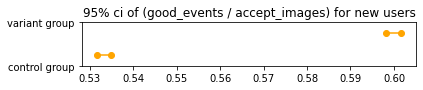

In [105]:
for lower,upper,y in zip([lower_con,lower_var],[upper_con,upper_var],[0,1]):
    plt.plot((lower,upper),(y,y),'ro-',color='orange')
plt.gca().set_aspect(0.005, adjustable='box')
plt.yticks([-0.5,1.5],['control group','variant group'])
plt.title('95% ci of (good_events / accept_images) for new users')

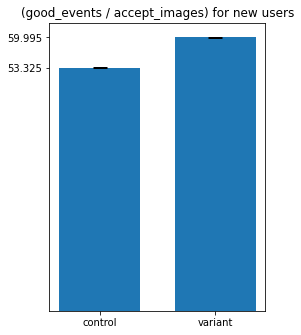

In [106]:
fig = plt.figure()
ax = fig.add_axes([0,0,0.5,1])
langs = ['control', 'variant']
shares = [share_good_images_uploaded_new_user_control*100,share_good_images_uploaded_new_user_variant*100]
ax.bar(langs,shares,width=0.7,yerr=(upper_con-lower_con)/2*100,capsize=7)
ax.set_ylim(ymin=0)
plt.yticks([share_good_images_uploaded_new_user_control*100,share_good_images_uploaded_new_user_variant*100])
plt.title('(good_events / accept_images) for new users')
plt.show()

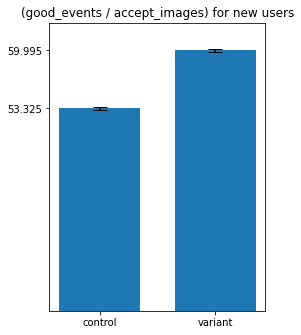

In [107]:
fig = plt.figure()
ax = fig.add_axes([0,0,0.5,1])
langs = ['control', 'variant']
shares = [share_good_images_uploaded_new_user_control*100,share_good_images_uploaded_new_user_variant*100]
ax.bar(langs,shares,width=0.7,yerr=(upper_con-lower_con)/2*100,capsize=7)
ax.set_ylim(ymin=30)
plt.yticks([share_good_images_uploaded_new_user_control*100,share_good_images_uploaded_new_user_variant*100])
plt.title('(good_events / accept_images) for new users')
plt.show()

### Returning Users

In [108]:
returning_control = joined_db[(joined_db['key']=='camera_quality_analysis_v4')&(joined_db['string_value']=='control_group')]['event_name'].value_counts()

In [109]:
returning_variant = joined_db[(joined_db['key']=='camera_quality_analysis_v4')&(joined_db['string_value']=='variant_a')]['event_name'].value_counts()

In [110]:
returning_control

diagnosis_accept_image               146873
diagnosis_open_camera                146061
diagnosis_take_image                 118240
diagnosis_detect_pathogen             52257
diagnosis_detect_crop                 38741
diagnosis_detect_other_too_far        17767
diagnosis_detect_other_blurry         14333
diagnosis_detect_other_additional      7527
diagnosis_detect_other_ornamental      5312
diagnosis_detect_other_bad_image       3526
diagnosis_detect_crop_group            1969
Name: event_name, dtype: int64

In [111]:
returning_variant

diagnosis_open_camera                145592
diagnosis_accept_image               134198
diagnosis_take_image                 128501
diagnosis_detect_pathogen             53391
diagnosis_detect_crop                 38995
diagnosis_detect_other_too_far        10756
diagnosis_detect_other_blurry          7840
diagnosis_detect_other_additional      7590
diagnosis_detect_other_ornamental      5292
diagnosis_detect_other_bad_image       3520
diagnosis_detect_crop_group            1989
Name: event_name, dtype: int64

In [112]:
share_bad_images_uploaded_returning_control = (
    (returning_control['diagnosis_detect_other_too_far']+ returning_control['diagnosis_detect_other_blurry'])/returning_control['diagnosis_accept_image']
)

share_bad_images_uploaded_returning_variant = (
    (returning_variant['diagnosis_detect_other_too_far']+ returning_variant['diagnosis_detect_other_blurry'])/returning_variant['diagnosis_accept_image']
)

share_good_images_uploaded_returning_control = (
    (returning_control['diagnosis_detect_pathogen']+returning_control['diagnosis_detect_crop']+returning_control['diagnosis_detect_crop_group'])/returning_control['diagnosis_accept_image']
)

share_good_images_uploaded_returning_variant = (
    (returning_variant['diagnosis_detect_pathogen']+returning_variant['diagnosis_detect_crop']+returning_variant['diagnosis_detect_crop_group'])/returning_variant['diagnosis_accept_image']
)

In [113]:
print(share_bad_images_uploaded_returning_control)
print(share_bad_images_uploaded_returning_variant)
print(share_good_images_uploaded_returning_control)
print(share_good_images_uploaded_returning_variant)

0.21855616757334567
0.138571364699921
0.6329754277505055
0.7032519113548638


#### Bad events (returning users)

In [114]:
n_con = returning_control['diagnosis_accept_image']
n_var = returning_variant['diagnosis_accept_image']
successes = [
    (returning_control['diagnosis_detect_other_too_far']+ returning_control['diagnosis_detect_other_blurry']),
    (returning_variant['diagnosis_detect_other_too_far']+ returning_variant['diagnosis_detect_other_blurry'])
    ]
nobs = [n_con, n_var]
z_stat, pval = proportions_ztest(successes,nobs=nobs,alternative='larger')
(lower_con, lower_var), (upper_con, upper_var) = proportion_confint(successes, nobs=nobs, alpha=0.05)

print(f'No. of images uploaded by control group: {n_con}')
print(f'No. of images with quality issues (control): {successes[0]}')
print(f'share of images with quality issues uploaded by returning users (control): {share_bad_images_uploaded_returning_control*100:.2f}%')
print(f'No. of images uploaded by variant group: {n_var}')
print(f'No. of images with quality issues (variant): {successes[1]}')
print(f'share of images with quality issues uploaded by returning users (variant): {share_bad_images_uploaded_returning_variant*100:.2f}%')
print(f'Relative Change: {(share_bad_images_uploaded_returning_variant-share_bad_images_uploaded_returning_control)/share_bad_images_uploaded_returning_control*100:.0f}%')

print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print(f'ci 95% for control group: [{lower_con:.3f},{upper_con:.3f}]')
print(f'ci 95% for variant group: [{lower_var:.3f},{upper_var:.3f}]')

No. of images uploaded by control group: 146873
No. of images with quality issues (control): 32100
share of images with quality issues uploaded by returning users (control): 21.86%
No. of images uploaded by variant group: 134198
No. of images with quality issues (variant): 18596
share of images with quality issues uploaded by returning users (variant): 13.86%
Relative Change: -37%
z statistic: 55.09
p-value: 0.000
ci 95% for control group: [0.216,0.221]
ci 95% for variant group: [0.137,0.140]


C:\Users\Behzad\AppData\Local\Temp/ipykernel_4200/1130757486.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot((lower,upper),(y,y),'ro-',color='orange')


Text(0.5, 1.0, '95% ci of (bad_events / accept_images) for returning users')

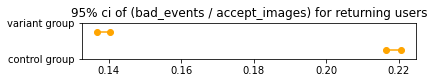

In [115]:
for lower,upper,y in zip([lower_con,lower_var],[upper_con,upper_var],[0,1]):
    plt.plot((lower,upper),(y,y),'ro-',color='orange')
plt.gca().set_aspect(0.005, adjustable='box')
plt.yticks([-0.5,1.5],['control group','variant group'])
plt.title('95% ci of (bad_events / accept_images) for returning users')

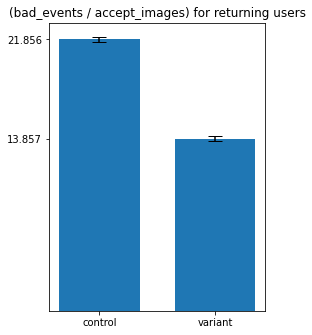

In [116]:
fig = plt.figure()
ax = fig.add_axes([0,0,0.5,1])
langs = ['control', 'variant']
shares = [share_bad_images_uploaded_returning_control*100,share_bad_images_uploaded_returning_variant*100]
ax.bar(langs,shares,width=0.7,yerr=(upper_con-lower_con)/2*100,capsize=7)
ax.set_ylim(ymin=0)
plt.yticks([share_bad_images_uploaded_returning_control*100,share_bad_images_uploaded_returning_variant*100])
plt.title('(bad_events / accept_images) for returning users')
plt.show()

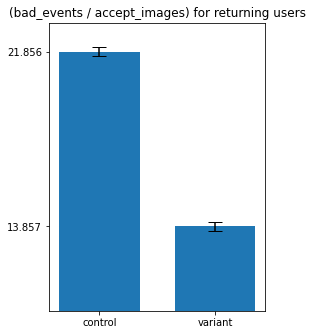

In [117]:
fig = plt.figure()
ax = fig.add_axes([0,0,0.5,1])
langs = ['control', 'variant']
shares = [share_bad_images_uploaded_returning_control*100,share_bad_images_uploaded_returning_variant*100]
ax.bar(langs,shares,width=0.7,yerr=(upper_con-lower_con)/2*100,capsize=7)
ax.set_ylim(ymin=10)
plt.yticks([share_bad_images_uploaded_returning_control*100,share_bad_images_uploaded_returning_variant*100])
plt.title('(bad_events / accept_images) for returning users')
plt.show()

#### Good events (returning users)

In [118]:
n_con = returning_control['diagnosis_accept_image']
n_var = returning_variant['diagnosis_accept_image']
successes = [
    (returning_control['diagnosis_detect_pathogen']+ returning_control['diagnosis_detect_crop']+returning_control['diagnosis_detect_crop_group']),
    (returning_variant['diagnosis_detect_pathogen']+ returning_variant['diagnosis_detect_crop']+returning_variant['diagnosis_detect_crop_group'])
    ]
nobs = [n_con, n_var]
z_stat, pval = proportions_ztest(successes,nobs=nobs,alternative='smaller')
(lower_con, lower_var), (upper_con, upper_var) = proportion_confint(successes, nobs=nobs, alpha=0.05)

print(f'No. of images uploaded by control group: {n_con}')
print(f'No. of detect crop images (control): {successes[0]}')
print(f'share of good images uploaded by returning users (control): {share_good_images_uploaded_returning_control*100:.2f}%')
print(f'No. of images uploaded by variant group: {n_var}')
print(f'No. of detect crop images (variant): {successes[1]}')
print(f'share of good images uploaded by returning users (variant): {share_good_images_uploaded_returning_variant*100:.2f}%')
print(f'Relative Change: {(share_good_images_uploaded_returning_variant-share_good_images_uploaded_returning_control)/share_good_images_uploaded_returning_control*100:.0f}%')

print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print(f'ci 95% for control group: [{lower_con:.4f},{upper_con:.4f}]')
print(f'ci 95% for variant group: [{lower_var:.4f},{upper_var:.4f}]')

No. of images uploaded by control group: 146873
No. of detect crop images (control): 92967
share of good images uploaded by returning users (control): 63.30%
No. of images uploaded by variant group: 134198
No. of detect crop images (variant): 94375
share of good images uploaded by returning users (variant): 70.33%
Relative Change: 11%
z statistic: -39.47
p-value: 0.000
ci 95% for control group: [0.6305,0.6354]
ci 95% for variant group: [0.7008,0.7057]


C:\Users\Behzad\AppData\Local\Temp/ipykernel_4200/2172459993.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot((lower,upper),(y,y),'ro-',color='orange')


Text(0.5, 1.0, '95% ci of (good_events / accept_images) for returning users')

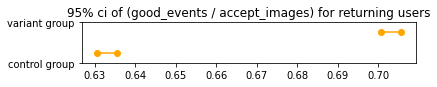

In [119]:
for lower,upper,y in zip([lower_con,lower_var],[upper_con,upper_var],[0,1]):
    plt.plot((lower,upper),(y,y),'ro-',color='orange')
plt.gca().set_aspect(0.005, adjustable='box')
plt.yticks([-0.5,1.5],['control group','variant group'])
plt.title('95% ci of (good_events / accept_images) for returning users')

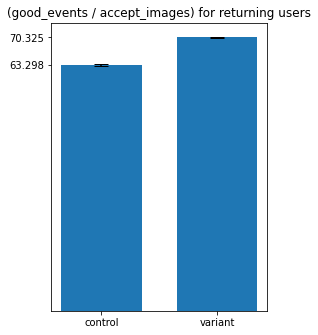

In [120]:
fig = plt.figure()
ax = fig.add_axes([0,0,0.5,1])
langs = ['control', 'variant']
shares = [share_good_images_uploaded_returning_control*100,share_good_images_uploaded_returning_variant*100]
ax.bar(langs,shares,width=0.7,yerr=(upper_con-lower_con)/2*100,capsize=7)
ax.set_ylim(ymin=0)
plt.yticks([share_good_images_uploaded_returning_control*100,share_good_images_uploaded_returning_variant*100])
plt.title('(good_events / accept_images) for returning users')
plt.show()

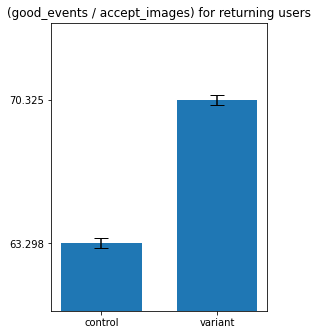

In [121]:
fig = plt.figure()
ax = fig.add_axes([0,0,0.5,1])
langs = ['control', 'variant']
shares = [share_good_images_uploaded_returning_control*100,share_good_images_uploaded_returning_variant*100]
ax.bar(langs,shares,width=0.7,yerr=(upper_con-lower_con)/2*100,capsize=7)
ax.set_ylim(ymin=60)
plt.yticks([share_good_images_uploaded_returning_control*100,share_good_images_uploaded_returning_variant*100])
plt.title('(good_events / accept_images) for returning users')
plt.show()

## MH TEST

### Preparation

In [122]:
control = joined_db[joined_db['string_value']=='control_group']
variant = joined_db[joined_db['string_value']=='variant_a']

In [123]:
all_control = control['event_name'].value_counts()
all_variant = variant['event_name'].value_counts()

### Open camera per day

In [124]:
select=['diagnosis_open_camera']
control_daily_open_camera = control[control['event_name'].isin(select)].groupby([pd.Grouper(key='event_timestamp_db',freq='1d'),'event_name']).size().unstack()
variant_daily_open_camera = variant[variant['event_name'].isin(select)].groupby([pd.Grouper(key='event_timestamp_db',freq='1d'),'event_name']).size().unstack()

In [125]:
print(control_daily_open_camera.mean()[0])
print(control_daily_open_camera.std()[0])

12192.355555555556
3573.1751614416326


In [126]:
print(variant_daily_open_camera.mean()[0])
print(variant_daily_open_camera.std()[0])

11982.555555555555
3401.1997920222984


In [127]:
control_mean = control_daily_open_camera.mean()[0]
control_std = control_daily_open_camera.std()[0]
variant_mean = variant_daily_open_camera.mean()[0]
variant_std = variant_daily_open_camera.std()[0]

z_stat, pval = ztest(control_daily_open_camera,variant_daily_open_camera,alternative='two-sided',value=0)
lower_con, upper_con = zconfint(control_daily_open_camera, alpha=0.05/4)
lower_var, upper_var = zconfint(variant_daily_open_camera, alpha=0.05/4)

print(f'Average of daily open camera event of control group: {control_mean:.2f}')
print(f'Standard deviation of daily open camera event of control group: {control_std:.2f}')
print(f'Average of daily open camera event of variant group: {variant_mean:.2f}')
print(f'Standard deviation of daily open camera event of control group: {variant_std:.2f}')

print(f'z statistic: {z_stat[0]:.2f}')
print(f'p-value: {pval[0]:.2f}')
print(f'ci 95%/4 for control group: [{lower_con[0]:.4f},{upper_con[0]:.2f}]')
print(f'ci 95%/4 for variant group: [{lower_var[0]:.4f},{upper_var[0]:.2f}]')

Average of daily open camera event of control group: 12192.36
Standard deviation of daily open camera event of control group: 3573.18
Average of daily open camera event of variant group: 11982.56
Standard deviation of daily open camera event of control group: 3401.20
z statistic: 0.29
p-value: 0.78
ci 95%/4 for control group: [10861.9340,13522.78]
ci 95%/4 for variant group: [10716.1666,13248.94]


C:\Users\Behzad\AppData\Local\Temp/ipykernel_4200/1763510736.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot((lower,upper),(y,y),'ro-',color='orange')


Text(0.5, 1.0, '95%/4 ci of open camera event')

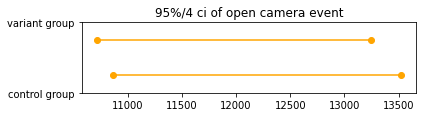

In [128]:
wis1=(upper_con[0]-lower_con[0])/2
wis2=(upper_var[0]-lower_var[0])/2
for lower,upper,y in zip([lower_con,lower_var],[upper_con,upper_var],[-wis1*25,+wis2*25]):
    plt.plot((lower,upper),(y,y),'ro-',color='orange')
plt.gca().set_aspect(0.005, adjustable='box')
plt.yticks([-50*wis1,+50*wis2],['control group','variant group'])
plt.title('95%/4 ci of open camera event')

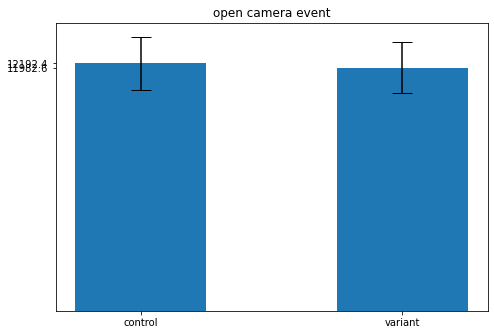

In [129]:
wis1=(upper_con[0]-lower_con[0])/2
wis2=(upper_var[0]-lower_var[0])/2
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['control', 'variant']
shares = [control_mean,variant_mean]
ax.bar(langs,shares,width=0.5,yerr=[wis1,wis2],capsize=10)
ax.set_ylim(ymin=0)
plt.yticks([control_mean,variant_mean])
plt.title('open camera event')
plt.show()

### Take image per day

In [130]:
select=['diagnosis_take_image']
control_daily_take_image = control[control['event_name'].isin(select)].groupby([pd.Grouper(key='event_timestamp_db',freq='1d'),'event_name']).size().unstack()
variant_daily_take_image = variant[variant['event_name'].isin(select)].groupby([pd.Grouper(key='event_timestamp_db',freq='1d'),'event_name']).size().unstack()

In [131]:
print(control_daily_take_image.mean()[0])
print(control_daily_take_image.std()[0])

9739.31111111111
2864.478231261976


In [132]:
print(variant_daily_take_image.mean()[0])
print(variant_daily_take_image.std()[0])

10162.08888888889
2883.6463881549676


In [133]:
control_mean = control_daily_take_image.mean()[0]
control_std = control_daily_take_image.std()[0]
variant_mean = variant_daily_take_image.mean()[0]
variant_std = variant_daily_take_image.std()[0]

z_stat, pval = ztest(control_daily_take_image,variant_daily_take_image,alternative='two-sided',value=0)
lower_con, upper_con = zconfint(control_daily_take_image, alpha=0.05/4)
lower_var, upper_var = zconfint(variant_daily_take_image, alpha=0.05/4)

print(f'Average of daily take image event of control group: {control_mean:.2f}')
print(f'Standard deviation of daily take image event of control group: {control_std:.2f}')
print(f'Average of daily take image event of variant group: {variant_mean:.2f}')
print(f'Standard deviation of daily take image event of control group: {variant_std:.2f}')

print(f'z statistic: {z_stat[0]:.2f}')
print(f'p-value: {pval[0]:.2f}')
print(f'ci 95%/4 for control group: [{lower_con[0]:.4f},{upper_con[0]:.2f}]')
print(f'ci 95%/4 for variant group: [{lower_var[0]:.4f},{upper_var[0]:.2f}]')

Average of daily take image event of control group: 9739.31
Standard deviation of daily take image event of control group: 2864.48
Average of daily take image event of variant group: 10162.09
Standard deviation of daily take image event of control group: 2883.65
z statistic: -0.70
p-value: 0.49
ci 95%/4 for control group: [8672.7629,10805.86]
ci 95%/4 for variant group: [9088.4037,11235.77]


C:\Users\Behzad\AppData\Local\Temp/ipykernel_4200/148853488.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot((lower,upper),(y,y),'ro-',color='orange')


Text(0.5, 1.0, '95%/4 ci of take image  event')

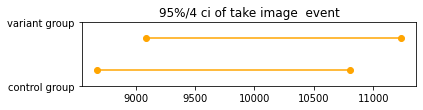

In [134]:
wis1=(upper_con[0]-lower_con[0])/2
wis2=(upper_var[0]-lower_var[0])/2
for lower,upper,y in zip([lower_con,lower_var],[upper_con,upper_var],[-wis1*25,+wis2*25]):
    plt.plot((lower,upper),(y,y),'ro-',color='orange')
plt.gca().set_aspect(0.005, adjustable='box')
plt.yticks([-50*wis1,+50*wis2],['control group','variant group'])
plt.title('95%/4 ci of take image  event')

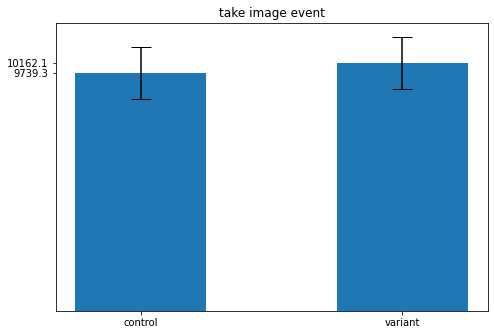

In [135]:
wis1=(upper_con[0]-lower_con[0])/2
wis2=(upper_var[0]-lower_var[0])/2
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['control', 'variant']
shares = [control_mean,variant_mean]
ax.bar(langs,shares,width=0.5,yerr=[wis1,wis2],capsize=10)
ax.set_ylim(ymin=0)
plt.yticks([control_mean,variant_mean])
plt.title('take image event')
plt.show()

### good event

In [136]:
share_good_images_uploaded_all_control = (all_control['diagnosis_detect_crop']+all_control['diagnosis_detect_crop_group']+ all_control['diagnosis_detect_pathogen'])/all_control['diagnosis_accept_image']
share_good_images_uploaded_all_variant = (all_variant['diagnosis_detect_crop']+all_variant['diagnosis_detect_crop_group']+ all_variant['diagnosis_detect_pathogen'])/all_variant['diagnosis_accept_image']

In [137]:
share_good_images_uploaded_all_control

0.561322834283436

In [138]:
share_good_images_uploaded_all_variant

0.6305092965073347

In [139]:
n_con = all_control['diagnosis_accept_image']
n_var = all_variant['diagnosis_accept_image']
successes = [
    (all_control['diagnosis_detect_crop']+all_control['diagnosis_detect_crop_group']+ all_control['diagnosis_detect_pathogen']),
    (all_variant['diagnosis_detect_crop']+all_variant['diagnosis_detect_crop_group']+ all_variant['diagnosis_detect_pathogen'])
    ]
nobs = [n_con, n_var]
z_stat, pval = proportions_ztest(successes,nobs=nobs,alternative='smaller')
(lower_con, lower_var), (upper_con, upper_var) = proportion_confint(successes, nobs=nobs, alpha=0.05/4)

print(f'No. of images uploaded by control group: {n_con}')
print(f'No. of good images (control): {successes[0]}')
print(f'share of good images uploaded by all users (control): {share_good_images_uploaded_all_control*100:.2f}%')
print(f'No. of images uploaded by variant group: {n_var}')
print(f'No. of good images (variant): {successes[1]}')
print(f'share of good images uploaded by all users (variant): {share_good_images_uploaded_all_variant*100:.2f}%')
print(f'Relative Change: {(share_good_images_uploaded_all_variant-share_good_images_uploaded_all_control)/share_good_images_uploaded_all_control*100:.0f}%')

print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print(f'ci 95% for control group: [{lower_con:.3f},{upper_con:.3f}]')
print(f'ci 95% for variant group: [{lower_var:.3f},{upper_var:.3f}]')

No. of images uploaded by control group: 521698
No. of good images (control): 292841
share of good images uploaded by all users (control): 56.13%
No. of images uploaded by variant group: 453665
No. of good images (variant): 286040
share of good images uploaded by all users (variant): 63.05%
Relative Change: 12%
z statistic: -69.39
p-value: 0.000
ci 95% for control group: [0.560,0.563]
ci 95% for variant group: [0.629,0.632]


C:\Users\Behzad\AppData\Local\Temp/ipykernel_4200/4294364649.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot((lower,upper),(y,y),'ro-',color='orange')


Text(0.5, 1.0, '95%/4 ci of (good_events / accept_images) for all users')

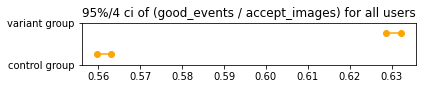

In [140]:
for lower,upper,y in zip([lower_con,lower_var],[upper_con,upper_var],[0,1]):
    plt.plot((lower,upper),(y,y),'ro-',color='orange')
plt.gca().set_aspect(0.005, adjustable='box')
plt.yticks([-0.5,1.5],['control group','variant group'])
plt.title('95%/4 ci of (good_events / accept_images) for all users')

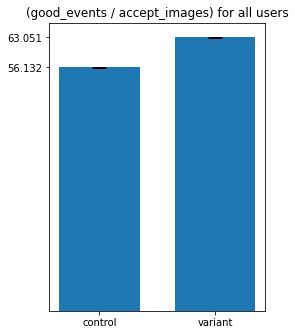

In [141]:
fig = plt.figure()
ax = fig.add_axes([0,0,0.5,1])
langs = ['control', 'variant']
shares = [share_good_images_uploaded_all_control*100,share_good_images_uploaded_all_variant*100]
ax.bar(langs,shares,width=0.7,yerr=(upper_con-lower_con)/2*100,capsize=7)
ax.set_ylim(ymin=0)
plt.yticks([share_good_images_uploaded_all_control*100,share_good_images_uploaded_all_variant*100])
plt.title('(good_events / accept_images) for all users')
plt.show()

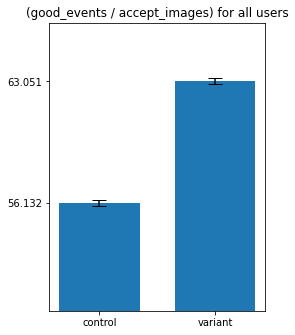

In [142]:
fig = plt.figure()
ax = fig.add_axes([0,0,0.5,1])
langs = ['control', 'variant']
shares = [share_good_images_uploaded_all_control*100,share_good_images_uploaded_all_variant*100]
ax.bar(langs,shares,width=0.7,yerr=(upper_con-lower_con)/2*100,capsize=7)
ax.set_ylim(ymin=50)
plt.yticks([share_good_images_uploaded_all_control*100,share_good_images_uploaded_all_variant*100])
plt.title('(good_events / accept_images) for all users')
plt.show()

### bad event

In [143]:
share_bad_images_uploaded_all_control = (all_control['diagnosis_detect_other_too_far']+ all_control['diagnosis_detect_other_blurry'])/all_control['diagnosis_accept_image']
share_bad_images_uploaded_all_variant = (all_variant['diagnosis_detect_other_too_far']+ all_variant['diagnosis_detect_other_blurry'])/all_variant['diagnosis_accept_image']

In [144]:
share_bad_images_uploaded_all_control

0.2533879754187288

In [145]:
share_bad_images_uploaded_all_variant

0.1727662482228076

In [146]:
n_con = all_control['diagnosis_accept_image']
n_var = all_variant['diagnosis_accept_image']
successes = [
    (all_control['diagnosis_detect_other_too_far']+ all_control['diagnosis_detect_other_blurry']),
    (all_variant['diagnosis_detect_other_too_far']+ all_variant['diagnosis_detect_other_blurry'])
    ]
nobs = [n_con, n_var]
z_stat, pval = proportions_ztest(successes,nobs=nobs,alternative='larger')
(lower_con, lower_var), (upper_con, upper_var) = proportion_confint(successes, nobs=nobs, alpha=0.05/4)

print(f'No. of images uploaded by control group: {n_con}')
print(f'No. of images with quality issues (control): {successes[0]}')
print(f'share of images with quality issues uploaded by all users (control): {share_bad_images_uploaded_all_control*100:.2f}%')
print(f'No. of images uploaded by variant group: {n_var}')
print(f'No. of images with quality issues (variant): {successes[1]}')
print(f'share of images with quality issues uploaded by all users (variant): {share_bad_images_uploaded_all_variant*100:.2f}%')
print(f'Relative Change: {(share_bad_images_uploaded_all_variant-share_bad_images_uploaded_all_control)/share_bad_images_uploaded_all_control*100:.0f}%')

print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print(f'ci 95% for control group: [{lower_con:.3f},{upper_con:.3f}]')
print(f'ci 95% for variant group: [{lower_var:.3f},{upper_var:.3f}]')

No. of images uploaded by control group: 521698
No. of images with quality issues (control): 132192
share of images with quality issues uploaded by all users (control): 25.34%
No. of images uploaded by variant group: 453665
No. of images with quality issues (variant): 78378
share of images with quality issues uploaded by all users (variant): 17.28%
Relative Change: -32%
z statistic: 96.53
p-value: 0.000
ci 95% for control group: [0.252,0.255]
ci 95% for variant group: [0.171,0.174]


C:\Users\Behzad\AppData\Local\Temp/ipykernel_4200/2318048530.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot((lower,upper),(y,y),'ro-',color='orange')


Text(0.5, 1.0, '95%/4 ci of (bad_events / accept_images) for all users')

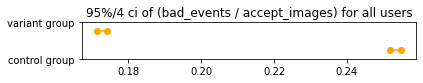

In [147]:
for lower,upper,y in zip([lower_con,lower_var],[upper_con,upper_var],[0,1]):
    plt.plot((lower,upper),(y,y),'ro-',color='orange')
plt.gca().set_aspect(0.005, adjustable='box')
plt.yticks([-0.5,1.5],['control group','variant group'])
plt.title('95%/4 ci of (bad_events / accept_images) for all users')

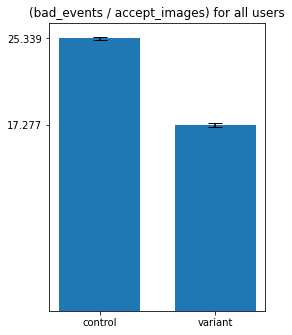

In [148]:
fig = plt.figure()
ax = fig.add_axes([0,0,0.5,1])
langs = ['control', 'variant']
shares = [share_bad_images_uploaded_all_control*100,share_bad_images_uploaded_all_variant*100]
ax.bar(langs,shares,width=0.7,yerr=(upper_con-lower_con)/2*100,capsize=7)
ax.set_ylim(ymin=0)
plt.yticks([share_bad_images_uploaded_all_control*100,share_bad_images_uploaded_all_variant*100])
plt.title('(bad_events / accept_images) for all users')
plt.show()

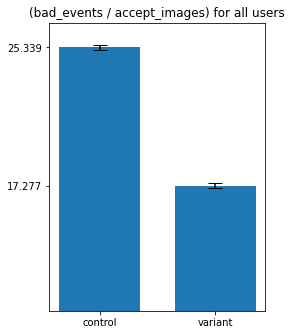

In [149]:
fig = plt.figure()
ax = fig.add_axes([0,0,0.5,1])
langs = ['control', 'variant']
shares = [share_bad_images_uploaded_all_control*100,share_bad_images_uploaded_all_variant*100]
ax.bar(langs,shares,width=0.7,yerr=(upper_con-lower_con)/2*100,capsize=7)
ax.set_ylim(ymin=10)
plt.yticks([share_bad_images_uploaded_all_control*100,share_bad_images_uploaded_all_variant*100])
plt.title('(bad_events / accept_images) for all users')
plt.show()

In [150]:
# done